In [147]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt
from sklearn import datasets

# ECS7023P K-Means Algorithm Elliot Linsey

Below I have created two small datasets and imported the iris dataset from the scikit-learn library. The reason I have created the two datasets is that they have different dimensions, 1-D and 2-D. This is to make sure that the algorithm works for both 1-dimensional data and multi-dimensional data, as well as for plotting purposes.   

Both the created datasets have 3 clearly defined clusters that are suitable for K-Means clustering. There are no outliers and an equal number of datapoints per cluster which gives it a high potential for effective clustering. The iris dataset has 4 dimensions and 3 different types of iris flower. One of the flower types is clearly separated from the other two, however the other two are harder to differentiate which may affect the ability of the algorithm to effectively cluster them. To plot the iris dataset, we later on use PCA to reduce the dimensions to 2.

In [148]:
data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,50,49,51])
iris = datasets.load_iris()

To demonstrate K-Means clustering, I will perform an example manually on the 1-D dataset. 

Firstly, we must choose a k-number. In this instance let us select k=3 so that the optimum number of clusters is selected (we only know this due to creating the custom dataset, in real life we would investigate multiple different k-numbers to find the optimum).

Once we have decided on a k-number, the algorithm randomly chooses k initial centroids, in this case 3. These centroids will be the beginning of the clusters and the values will start to group around them at first, after this the means of each cluster will be taken and the values will cluster around these. This process will continue repeating until the means no longer change, at this point the clusters will be considered stabilised.

Our 1-D data is: [1,5,3,2,6,25,26,24,27,28,53,52,50,49,51]. 

If our initial random centroids are designated as 25,28 and 49, the initial clusters would be: 

25:[25,26,24,6,5,3,2,1]

28:[28,27]

49:[49,50,51,52,53]

The means of these initial clusters are [11.5,27.5,51]. If we now recluster the values around these cluster means, we get:

11.5:[6,5,3,2,1]

27.5:[24,25,26,27,28]

51:[49,50,51,52,53]

Finding the means of these values results in [3.4,26,51]. If we were to recluster around these means we would end up with the same clusters. In this case the clusters would be considered stabilised as the means have not moved between iterations and these clusters would be our final clusters.   


## Testing

To follow a test-driven development cycle, I will first implement pseudo-code to establish what types of tests I will need. 

Assert that the choice of k results in k initial centroids. 

Assert that a list of k initial centroids is returned from randomly selecting them.

Assert that the clustering function is grouping points with the smallest distance from the centroid/previous cluster mean.

Assert that the update function is adequately finding the means of the centroids, then feeding them back into the clustering function to be reclustered.

In [149]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

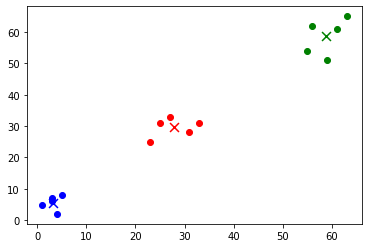

In [150]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        #print('centroids = ' + str(lst))
        #print([i[0] for i in lst])
        return [i[0] for i in lst]
    def clusters(self,centroids):
        #print('cluster centroids = ' + str(centroids))
        cluster_vals = [[] for i in range(len(centroids))]
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for x in centroids:
                distances.append(np.linalg.norm(y - x))
            #print(distances)
            idx = distances.index(min(distances))
            #print(idx)
            cluster_vals[idx].append(y)
        for i in range(len(cluster_vals)):
            if len(cluster_vals[i]) == 0:
                cluster_vals[i].append(centroids[i])
        #print(cluster_vals)               
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []       
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))
            #print('x = ' + str(x))
        #print('means = ' + str(cluster_means))     
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                updates = self.update(updates)
                #print(updates)
        #print('It took ' + str(count) + ' cycles!')
        return updates
    def k_means_repeat(self):
        clusters = []
        variances = []
        for r in range(10):
            clusters.append(self.k_means_func())
        for x in clusters:
            count = 0
            for i in range(self.k):
                count += np.var(x[i])
                #print(np.var(x[i]))
            #print(count)
            variances.append(count)
        #print(variances)
        return clusters[variances.index(np.min(variances))]
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print('test array = ' + str(np.mean(test_array[0][:,0])))
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
    def plot_repeat(self):
        test_plot = self.k_means_repeat()
        #print(test_plot)
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        if self.data.ndim != 1:
            for i in range(self.k):
                plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
                plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        else:
            for i in range(self.k):
                plt.plot(test_plot[i], [0]*len(test_plot[i]), 'o',color = colors[i])
                plt.plot(np.mean(test_plot[i]), [0],'x', markersize=15,color = colors[i])
        return plt.show()
        
test = k_means(data, 3)    
#test.k_means_repeat()

test.plot_repeat()

In [151]:
test.k_means_func()

[[array([25, 31]),
  array([27, 33]),
  array([23, 25]),
  array([31, 28]),
  array([33, 31])],
 [array([55, 54]),
  array([59, 51]),
  array([63, 65]),
  array([56, 62]),
  array([61, 61])],
 [array([1, 5]), array([3, 6]), array([4, 2]), array([3, 7]), array([5, 8])]]

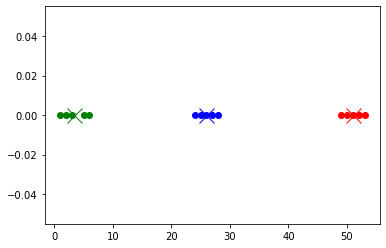

[[53, 52, 50, 49, 51], [25, 26, 24, 27, 28], [1, 5, 3, 2, 6]]

In [152]:
one_d = k_means(data_1d,3)
one_d.plot_repeat()
one_d.k_means_repeat()

In [153]:
from sklearn.decomposition import PCA
import pandas as pd
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(iris['data'])

projected = pca.transform(iris['data'])
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(0,len(iris['data'])))
projected.head()

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


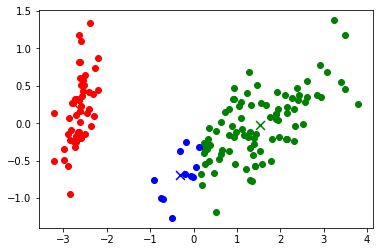

In [154]:
projected_np = projected.to_numpy()
projected_np
projected_k = k_means(projected_np,3)
projected_k.plot_repeat()


In [155]:
data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,50,49,51])

In [156]:
testing = k_means(data_1d, 3)
testing.update([[25,26,24,6,5,3,2,1],[28,27],[49,50,51,52,53]])

[[1, 5, 3, 2, 6], [25, 26, 24, 27, 28], [53, 52, 50, 49, 51]]

In [157]:
testing = k_means(data_1d, 6)
testing.clusters([25,26,24,27,28,50])

[[25], [26], [1, 5, 3, 2, 6, 24], [27], [28], [53, 52, 50, 49, 51]]

In [158]:
testing.update([[25], [26], [1, 5, 3, 2, 6, 24], [27], [28], [53, 52, 50, 49, 51]])

[[25, 24], [26], [1, 5, 3, 2, 6], [27], [28], [53, 52, 50, 49, 51]]

In [159]:
import unittest

class test_kmeans(unittest.TestCase):
    def test_size_of(self):
        testing = k_means(data_1d,3)
        centroids = testing.ini_centroids(data_1d,3)
        self.assertEqual(len(centroids), 3)
        testing2 = k_means(data_1d,6)
        centroids2 = testing2.ini_centroids(data_1d,6)
        self.assertEqual(len(centroids2), 6)
        testing3 = k_means(data_1d,9)
        centroids3 = testing3.ini_centroids(data_1d,9)
        self.assertEqual(len(centroids3), 9)
    def test_type_check(self):
        testing = k_means(data_1d,3)
        centroids = testing.ini_centroids(data_1d,3)
        self.assertEqual(type(centroids), list)
    def test_cluster(self):
        testing = k_means(data_1d,3)
        self.assertEqual(testing.clusters([25,28,49]),[[1, 5, 3, 2, 6, 25, 26, 24], [27, 28], [53, 52, 50, 49, 51]])
        testing2 = k_means(data_1d,6)
        self.assertEqual(testing2.clusters([25,28,49,3,53,5]),[[25, 26, 24], [27, 28], [50, 49, 51], 
                                                               [1, 3, 2], [53, 52], [5, 6]])
        testing3 = k_means(data_1d,2)
        self.assertEqual(testing3.clusters([53,51]),[[53, 52], [1, 5, 3, 2, 6, 25, 26, 24, 27, 28, 50, 49, 51]])
    def test_update(self):
        testing = k_means(data_1d, 3)
        self.assertEqual(testing.update([[25,26,24,6,5,3,2,1],[28,27],[49,50,51,52,53]]),
                                        [[1, 5, 3, 2, 6], [25, 26, 24, 27, 28], [53, 52, 50, 49, 51]])
        testing2 = k_means(data_1d, 6)
        self.assertEqual(testing.update([[25], [26], [1, 5, 3, 2, 6, 24], [27], [28], [53, 52, 50, 49, 51]]),
                        [[25, 24], [26], [1, 5, 3, 2, 6], [27], [28], [53, 52, 50, 49, 51]])
    def test_testing(self):
        self.assertEqual(5,5)
if __name__ == '__main__':
    unittest.main(argv=['this-is-ignored'],exit=False,verbosity=2)

test_cluster (__main__.test_kmeans) ... ok
test_size_of (__main__.test_kmeans) ... ok
test_testing (__main__.test_kmeans) ... ok
test_type_check (__main__.test_kmeans) ... ok
test_update (__main__.test_kmeans) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


In [160]:
testing2 = k_means(data_1d,6)
testing2.ini_centroids(data_1d,6)

[50, 28, 6, 25, 27, 2]